In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel('EastWestAirlines.xlsx')

In [3]:
df.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [4]:
df= pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.shape

(3999, 12)

In [6]:
df.isnull().sum()  # missing values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df.duplicated().sum()   # duplicate values

0

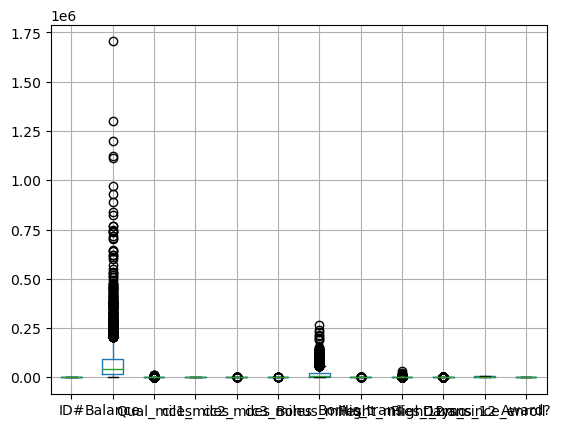

In [8]:
df.boxplot()   # outliers identified
plt.show()

In [9]:
def outliers(df,column):               # outliers removal using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x> upper_bound else x)

In [10]:
for i in df.select_dtypes(include=['float','int']).columns:
    outliers(df,i)

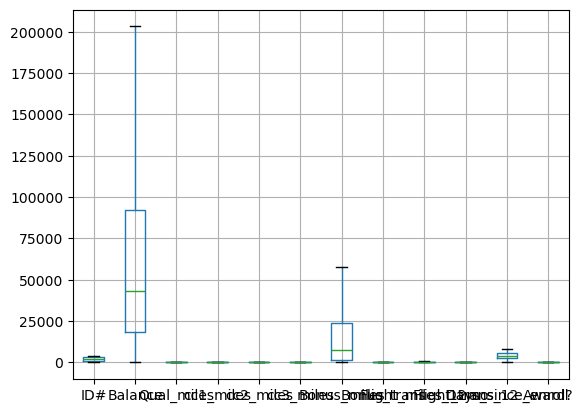

In [11]:
df.boxplot()   # no outliers
plt.show()

In [12]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1


In [13]:
scaler= MinMaxScaler()
scaled_df= scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[0.13848624, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.09469599, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.203495  , 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.36215654, 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.27014732, 0.        , 0.        , ..., 0.4       , 0.16867615,
        0.        ],
       [0.01484115, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [14]:
# using the Elbow method
max_clusters= min(10,scaled_df.shape[0])
inertia=[]
K= range(1,max_clusters+1)

In [15]:
for k in K:
    kmeans= KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

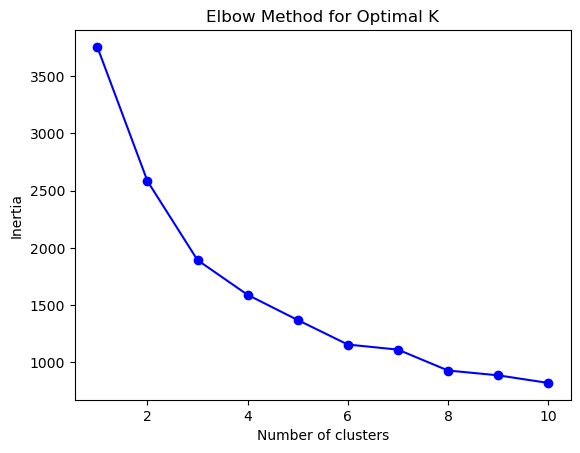

In [16]:
# plotting the elbow curve
plt.plot(K,inertia,'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
# applying KMeans 
optimal_k= 2
kmeans= KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels= kmeans.fit_predict(scaled_df)

In [18]:
# silhouette score for KMeans
silhouette_kmeans= silhouette_score(scaled_df, kmeans_labels)
print(f'Silhouette score for K-Means: {silhouette_kmeans:.2f}')

Silhouette score for K-Means: 0.37


In [19]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1


In [20]:
# Hierarchical clustering
features= df.drop(columns=['ID#'])
features.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1


In [21]:
linked= linkage(scaled_df,method='ward')

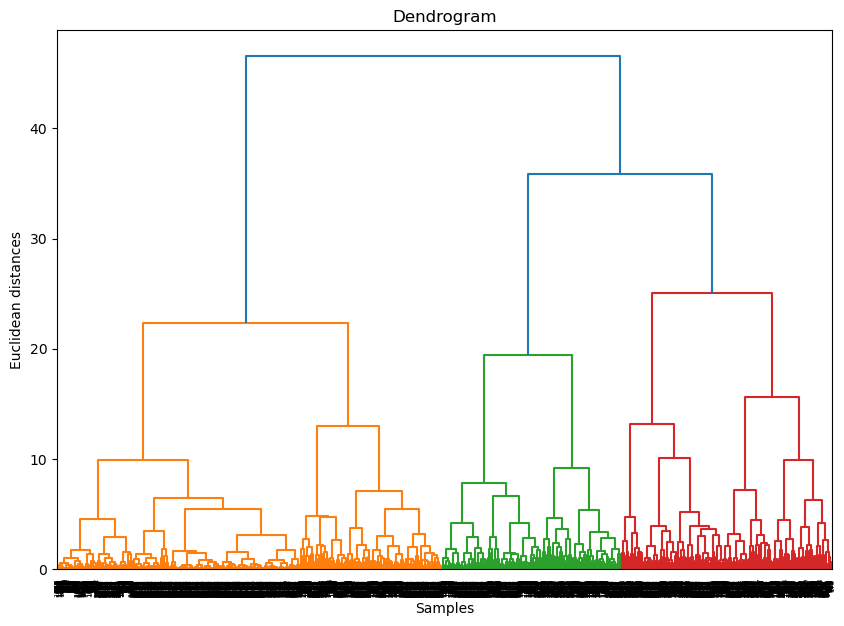

In [22]:
plt.figure(figsize=(10,7))      # Hirarchical clustering Visualization
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [24]:
# Applying DBSCAN
std_scaler= StandardScaler()
df_new= pd.DataFrame(std_scaler.fit_transform(df),columns=df.columns)

In [26]:
df_new.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919
1,-1.734263,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919
2,-1.733402,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919
3,-1.732540,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919
4,-1.731679,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918


In [32]:
eps= np.arange(0.1,0.7,0.1)   # Epsilon
min_node= range(1,11)      # Minpts
output=[]

In [34]:
for ep in eps:
    for mn in min_node:
        labels= DBSCAN(eps=ep,min_samples=mn).fit(df_new).labels_

In [36]:
score= silhouette_score(df_new,labels)

In [38]:
output.append([ep,mn,score])

In [40]:
a= pd.DataFrame(output)

In [42]:
score= a.iloc[:,2].max()     # silhouette score DBSCAN
score

-0.2700106357998858

In [46]:
a[a[2]==score]

,0,1,2
0,0.6,10,-0.270011


In [88]:
labels= DBSCAN(eps=0.2,min_samples=7).fit(df_new).labels_

In [90]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

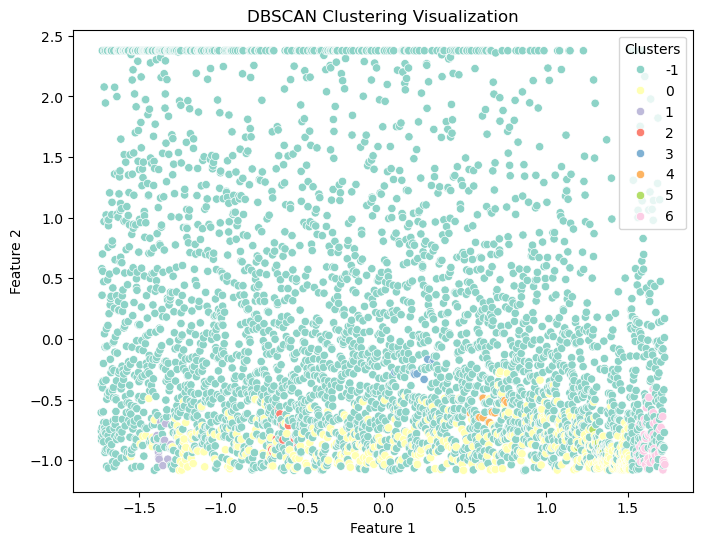

In [96]:
plt.figure(figsize=(8,6))      # DBSCAN Visualization
sns.scatterplot(data=df_new, x=df_new.iloc[:, 0], y=df_new.iloc[:, 1], hue=labels, palette='Set3')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering Visualization")
plt.legend(title="Clusters")
plt.show()